In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# load dataset
data=pd.read_csv(r"C:\Users\USER\Downloads\myexcel - myexcel.csv.csv")
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [2]:
#Preprocessing dataset
data.shape

(458, 9)

In [3]:
data.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [4]:
#check for duplicates
data.duplicated().sum()

0

In [5]:
#get summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [6]:
#get summary statistics of numeric columns
data.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In salary column mean >median.That means there is outliers,so replace missing values with median


In [8]:
#check for missing values
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [9]:
#find the mode of the college column
mode_value=data['College'].mode()[0]
mode_value

'Kentucky'

In [10]:
#Replace NAN in college column with mode
data['College'].fillna(mode_value,inplace=True)
data

C:\Users\USER\AppData\Local\Temp\ipykernel_8508\633903600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['College'].fillna(mode_value,inplace=True)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Kentucky,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,Kentucky,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,Kentucky,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [11]:
#fill the missing values in salary column with median
data['Salary']=data['Salary'].fillna(data['Salary'].median())

In [12]:
data.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [13]:
#REPLACE HEIGHT COLUMN WITH RANDOM VALUES
data['Height']=np.random.randint(150,181,size=len(data))
data


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,180,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,174,205,Boston University,2836186.0
3,R.J. Hunter,Boston Celtics,28,SG,22,151,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,179,231,Kentucky,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,180,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,155,179,Kentucky,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,162,256,Kentucky,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,163,231,Kansas,947276.0


In [14]:
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,180,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,174,205,Boston University,2836186.0
3,R.J. Hunter,Boston Celtics,28,SG,22,151,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,179,231,Kentucky,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,180,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,155,179,Kentucky,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,162,256,Kentucky,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,163,231,Kansas,947276.0


In [15]:
#analysing dataset
#distribution of employees across each team

team_count=data['Team'].value_counts()
team_count

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [16]:
#percentage split relative to total number of employees
team_percentage=(data['Team'].value_counts()/len(data)*100).round(2)
team_percentage

Team
New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
New York Knicks           3.49
Milwaukee Bucks           3.49
Brooklyn Nets             3.28
Portland Trail Blazers    3.28
Oklahoma City Thunder     3.28
Denver Nuggets            3.28
Washington Wizards        3.28
Miami Heat                3.28
Charlotte Hornets         3.28
Atlanta Hawks             3.28
San Antonio Spurs         3.28
Houston Rockets           3.28
Boston Celtics            3.28
Indiana Pacers            3.28
Detroit Pistons           3.28
Cleveland Cavaliers       3.28
Chicago Bulls             3.28
Sacramento Kings          3.28
Phoenix Suns              3.28
Los Angeles Lakers        3.28
Los Angeles Clippers      3.28
Golden State Warriors     3.28
Toronto Raptors           3.28
Philadelphia 76ers        3.28
Dallas Mavericks          3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: count, dtype: float64

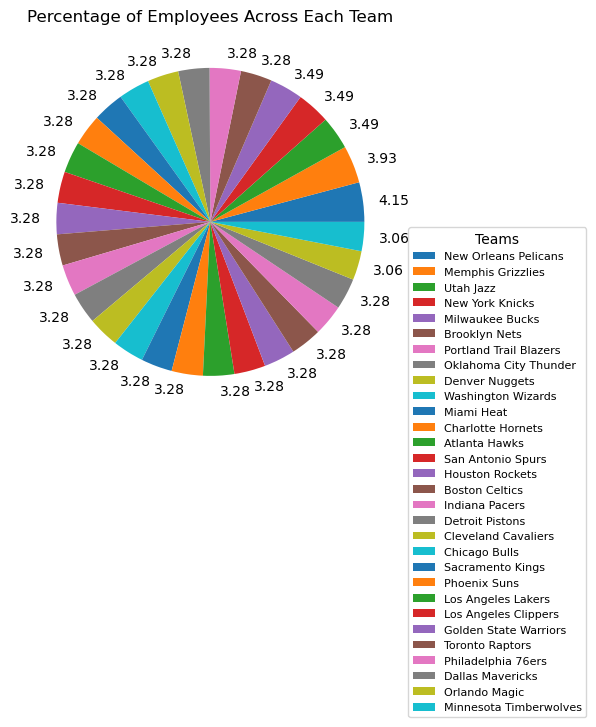

In [79]:
#visualization
plt.figure(figsize=(5,5))  
plt.pie(team_percentage,labels=team_percentage)
plt.legend(team_count.index,title="Teams", loc="upper left",bbox_to_anchor=(1, 0.5),prop={'size': 8})
plt.title("Percentage of Employees Across Each Team")
plt.show()

Key Insights from Employee Distribution Across Teams
Uneven Workforce Distribution – New Orleans Pelicans (4.15%) and Memphis Grizzlies (3.93%) have the highest employee share, while Minnesota Timberwolves (3.06%) have the lowest.

Standardized Staffing – Most teams have a similar employee percentage (3.28%), suggesting a balanced staffing model, possibly due to league regulations or budgeting.

Potential Impact on Performance – Higher employee numbers may indicate better operational efficiency, but further analysis is needed to determine its effect on team success.

In [19]:
#group by position
grouped=data.groupby('Position')
#display each group
for position, group in grouped:
    print(f"Employees in position: {position}")
    print(group[["Name","Team","Age","Salary"]])
    print("\n")

Employees in position: C
                Name                    Team  Age      Salary
7       Kelly Olynyk          Boston Celtics   25   2165160.0
10   Jared Sullinger          Boston Celtics   24   2569260.0
14      Tyler Zeller          Boston Celtics   26   2616975.0
23       Brook Lopez           Brooklyn Nets   28  19689000.0
27        Henry Sims           Brooklyn Nets   26    947276.0
..               ...                     ...  ...         ...
439    Mason Plumlee  Portland Trail Blazers   26   1415520.0
447      Rudy Gobert               Utah Jazz   23   1175880.0
455     Tibor Pleiss               Utah Jazz   26   2900000.0
456      Jeff Withey               Utah Jazz   26    947276.0
457         Priyanka               Utah Jazz   25    947276.0

[79 rows x 4 columns]


Employees in position: PF
                 Name                    Team  Age      Salary
4       Jonas Jerebko          Boston Celtics   29   5000000.0
5        Amir Johnson          Boston Celtics   29  12

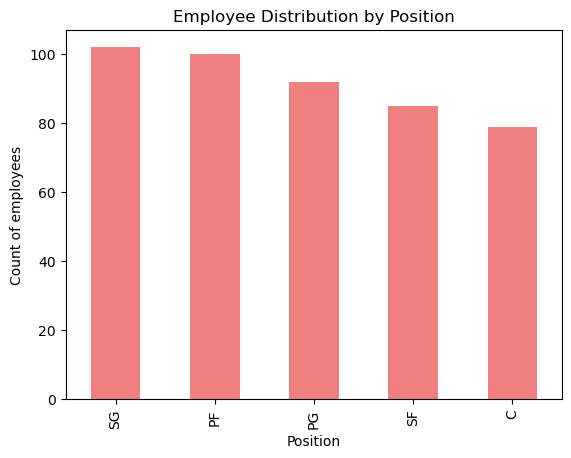

In [20]:
#visualization
position_counts = data['Position'].value_counts()
position_counts.plot(kind='bar',color='lightcoral')
plt.title("Employee Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Count of employees")
plt.show()


#analysing
 1 .Most Common Positions → SG (Shooting Guard) and PF (Power Forward) have the highest number of employees (~100).
These positions are the most in demand.

2 . Decreasing Trend → Employee count gradually reduces from SG/PF → PG → SF → C.
3 . Least Common Position → C (Center) has the lowest number of employees. This role might be harder to fill or less required.

 Key Takeaways
> The company hires more SG and PF roles.
> C is the least filled position—maybe due to skill or demand.

In [22]:
#predominant age group among employees

#create lamda function to create age group
data['Age_Group'] = data['Age'].apply(lambda Age: '20-29' if 20 <= Age <= 29 
                                      else ('30-39' if 30 <= Age <= 39
                                            else ('40-49' if 40 <= Age <= 49 
                                                  else 'Other')))
#create howmany employees are in each age group
Age_group_count =data['Age_Group'].value_counts()
Age_group_count


Age_Group
20-29    334
30-39    119
40-49      3
Other      2
Name: count, dtype: int64

In [23]:
predominant_age_group = Age_group_count.idxmax()
print("predominant_age_group : ",predominant_age_group)

predominant_age_group :  20-29


C:\Users\USER\AppData\Local\Temp\ipykernel_8508\3895516752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Count', data=df, palette='Blues')


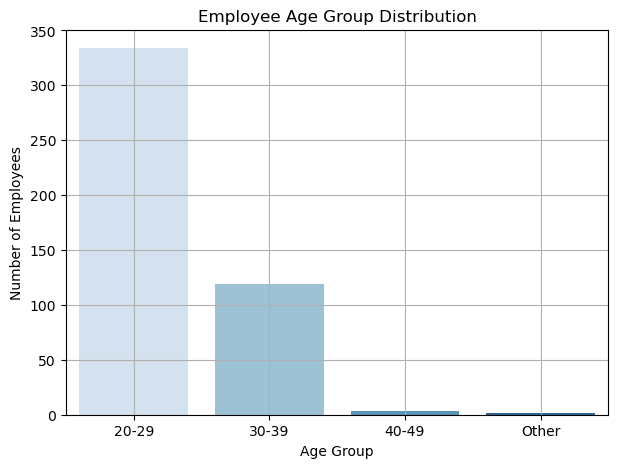

In [24]:
#visualisation
df = pd.DataFrame(list(Age_group_count.items()), columns=['Age Group', 'Count'])

# Plot bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x='Age Group', y='Count', data=df, palette='Blues')

# Customize plot
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.title('Employee Age Group Distribution')
plt.grid(True)
plt.show()

#analysing
1)Majority of employees are in the 20-29 age group.
2) Significant drop in employees after age 30.
3) Very few employees above 40, indicating possible retention issues.
4)The company may benefit from retention strategies to maintain workforce experience.


In [26]:
salary_exp = data.groupby(['Team', 'Position'])['Salary'].sum()
highest_team_position = salary_exp.idxmax()  # (Team, Position) with the highest expenditure
highest_team_position 

('Los Angeles Lakers', 'SF')

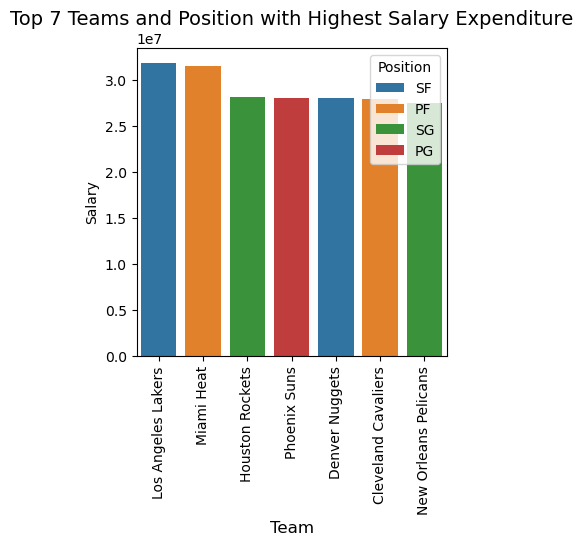

In [27]:
#visualisation for top 7 teams and position with high salary
#setting salary_exp as a dataframe
df = salary_exp.reset_index()  # Converts index ('Team', 'Position') into columns
top_teams = df.sort_values(by="Salary", ascending=False).head(7)

# Step 3: Create Bar Plot
plt.figure(figsize=(4,4))
sns.barplot(data=top_teams, x="Team", y="Salary",hue='Position', palette="tab10")

# Step 4: Customize the plot
plt.title("Top 7 Teams and Position with Highest Salary Expenditure", fontsize=14)
plt.xlabel("Team", fontsize=12)
plt.xticks(rotation=90)  # Rotate team names if needed
plt.show()



#analysing
1)Top 7 High-Spending Teams: Los Angeles Lakers, Miami Heat, Houston Rockets, Phoenix Suns, Denver Nuggets, Cleveland Cavaliers, New Orleans Pelicans.
2)Salary Range: Most teams' salary expenditures are around $30 million (3.0 × 10⁷).
PATTERN:
1)Position-Based Salary Allocation: Different teams prioritize different positions (SF, PF, SG, PG), suggesting varied team strategies.
2)Balanced Spending: No extreme outliers, indicating consistent salary distribution among top teams.
CORRELATION:
1)High Salary & Team Strength: Likely correlation between higher spending and competitive performance.
2)Salary vs. Position: Some teams might invest more in key roles, affecting overall team strategy


In [59]:
#correlation between age and salary
correlation = data['Age'].corr(df['Salary'])
print("Correlation between age and salary : ",correlation)

Correlation between age and salary :  0.05036926230312928


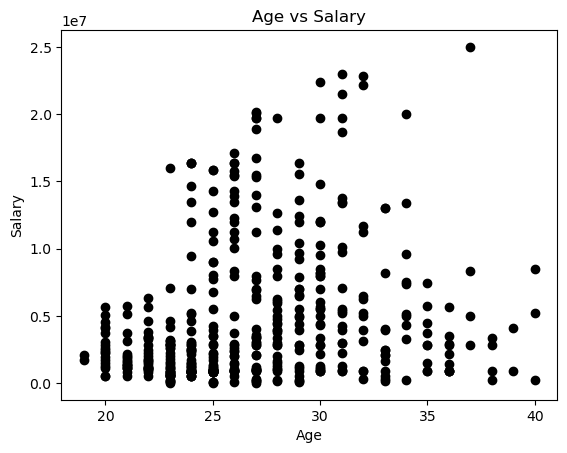

In [67]:
#Visualization using scatter plot
plt.scatter(x='Age',y='Salary',data=data,color='black')
#adding title and label
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

# Step 5: Show the plot
plt.show()


#analysing
1) Positive correlation: Salary tends to increase with age, peaking around 25-30.
2) High variance: Significant salary spread at all ages, with some very high outliers (~30 years old).
3)Outliers present: A few individuals earn exceptionally high salaries.
4)Moderate correlation: Likely around 0.3 to 0.6, suggesting other factors also influence salary.